# Stroke Prediction using ML

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df=data.drop(['id'],axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only BMI has null values

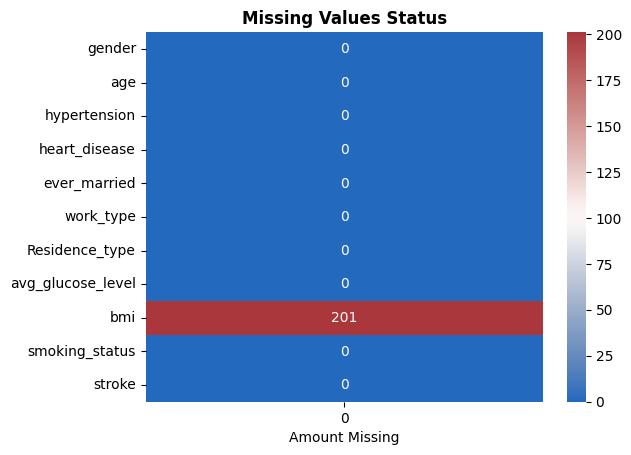

In [8]:
plt.title("Missing Values Status", fontweight = "bold")
ax = sns.heatmap(df.isnull().sum().to_frame(), annot = True, fmt = "d", cmap = "vlag")
ax.set_xlabel("Amount Missing")
plt.show()


In [9]:
df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


C:\Users\91704\AppData\Local\Temp\ipykernel_19384\1909440404.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True)


In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Null Problem solved

EDA

In [11]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

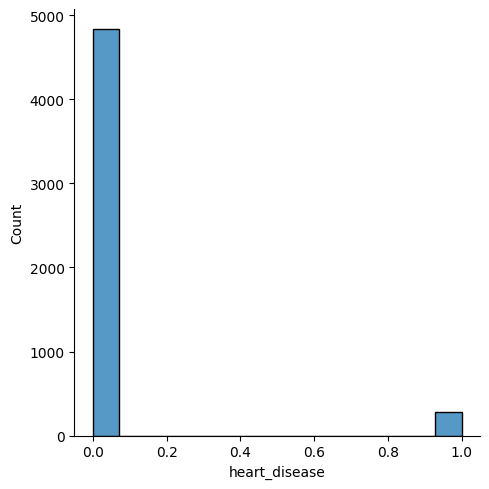

In [13]:
sns.displot(df['heart_disease'])

There are less people with heart disease

Let's Check correlation

C:\Users\91704\AppData\Local\Temp\ipykernel_19384\4091129708.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_corr = sns.heatmap(df.corr())


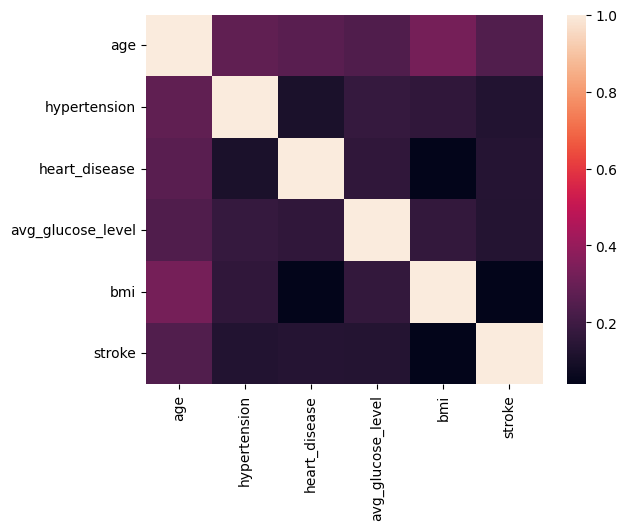

In [14]:
feature_corr = sns.heatmap(df.corr())

bmi , avg_glocose_level are negatively correlated

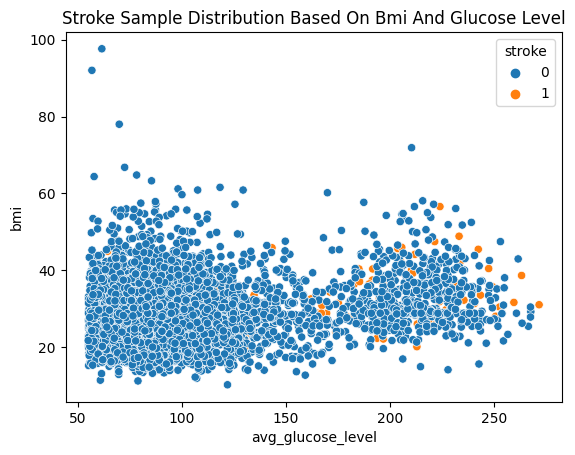

In [15]:
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['avg_glucose_level'],y=df['bmi'],hue=df['stroke'])
plt.show()

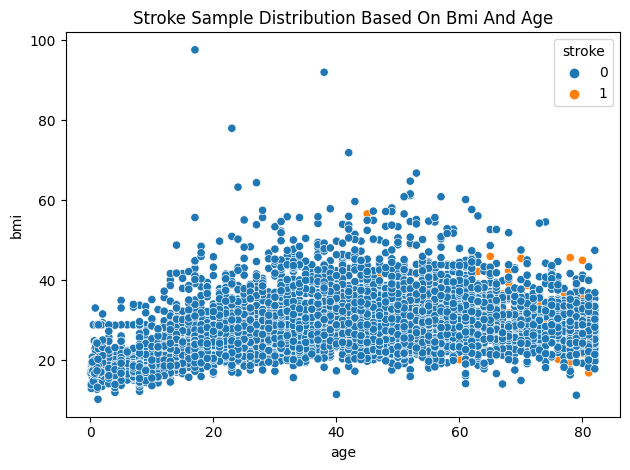

In [16]:
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'],y=df['bmi'],hue=df['stroke'])
plt.tight_layout()
plt.show()

In [17]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Dataset is imbalanced we have more no. of Non Stroke Patients Data

Feature Engineering and Preprocessing

In [18]:
def binarize_gender(val):
    if val == 'Male':
        return 1
    else:
        return 0 
    
df["gender"]=df["gender"].apply(binarize_gender)    

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [20]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

ever_married and work_type are not very important features to predict stroke so we are gonna drop them

In [21]:
fdf=df.drop(['ever_married','work_type'],axis=1)

In [22]:
fdf.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Urban,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Rural,202.21,28.893237,never smoked,1
2,1,80.0,0,1,Rural,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Urban,171.23,34.400000,smokes,1
4,0,79.0,1,0,Rural,174.12,24.000000,never smoked,1


In [23]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
fdf=fdf.apply(LabelEncoder().fit_transform)

In [24]:
fdf.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,3850,240,1,1
1,0,82,0,0,0,3588,162,2,1
2,1,101,0,1,0,2483,199,2,1
3,0,70,0,0,1,3385,218,3,1
4,0,100,1,0,0,3394,113,2,1


In [25]:
x=fdf.drop('stroke',axis=1)
y=fdf['stroke']

Using SMOTE for imbalanced dataset

In [26]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=np.random.randint(100), k_neighbors=5, n_jobs=-1)
x,y = smote.fit_resample(x,y)

c:\Users\91704\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [27]:
print(x.shape,y.shape)

(9722, 8) (9722,)


In [28]:
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,shuffle=True,test_size=0.2,random_state=42)

print('X_train shape=',x_tr.shape)
print('Y_train shape=',y_tr.shape)
print('X_test shape=',x_tst.shape)
print('Y_test shape=',y_tst.shape)

X_train shape= (7777, 8)
Y_train shape= (7777,)
X_test shape= (1945, 8)
Y_test shape= (1945,)


# Modelling 


In [29]:
rf=RandomForestClassifier()
rf.fit(x_tr,y_tr)


RandomForestClassifier()

In [30]:
y_preds=rf.predict(x_tst)

acc=accuracy_score(y_preds,y_tst)
ps=precision_score(y_preds,y_tst)
rcs=recall_score(y_preds,y_tst)

print('Accuracy=',acc)
print('Precision Score=',ps)
print('Recall Score=',rcs)

Accuracy= 0.9187660668380463
Precision Score= 0.9515463917525773
Recall Score= 0.8926499032882012


XG Boost Classifier

In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_preds=xgb.predict(x_tst)

acc=accuracy_score(y_preds,y_tst)
ps=precision_score(y_preds,y_tst)
rcs=recall_score(y_preds,y_tst)

print('Accuracy=',acc)
print('Precision Score=',ps)
print('Recall Score=',rcs)

Accuracy= 0.9259640102827763
Precision Score= 0.9608247422680413
Recall Score= 0.8978805394990366


Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_tr,y_tr)


GaussianNB()

In [34]:
y_preds=gnb.predict(x_tst)

acc=accuracy_score(y_preds,y_tst)
ps=precision_score(y_preds,y_tst)
rcs=recall_score(y_preds,y_tst)

print('Accuracy=',acc)
print('Precision Score=',ps)
print('Recall Score=',rcs)

Accuracy= 0.8051413881748072
Precision Score= 0.8814432989690721
Recall Score= 0.7640750670241286


Ada Boost Classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier(n_estimators=300,learning_rate=1,random_state=42)
abc.fit(x_tr,y_tr)

AdaBoostClassifier(learning_rate=1, n_estimators=300, random_state=42)

In [36]:
y_preds=abc.predict(x_tst)

acc=accuracy_score(y_preds,y_tst)
ps=precision_score(y_preds,y_tst)
rcs=recall_score(y_preds,y_tst)

print('Accuracy=',acc)
print('Precision Score=',ps)
print('Recall Score=',rcs)

Accuracy= 0.825706940874036
Precision Score= 0.8546391752577319
Recall Score= 0.807205452775073


KNN Classifier 

In [37]:
from sklearn.neighbors import  KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=9)

In [38]:
y_preds=knn.predict(x_tst)

acc=accuracy_score(y_preds,y_tst)
ps=precision_score(y_preds,y_tst)
rcs=recall_score(y_preds,y_tst)

print('Accuracy=',acc)
print('Precision Score=',ps)
print('Recall Score=',rcs)

Accuracy= 0.8616966580976864
Precision Score= 0.9731958762886598
Recall Score= 0.7952822240943556


Of all models LightBGM performed well so we will select it as final model 

In [39]:
import pickle

pickle.dump(xgb, open("xgb_model.pkl", "wb"))  